**[Course Home Page](https://www.kaggle.com/learn/machine-learning-for-insights)**

---

## Set Up


We have again provided code to do the basic loading, review and model-building. Run the cell below to set everything up:

In [59]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap

# Environment Set-Up for feedback system.
from learntools.core import binder
binder.bind(globals())
from learntools.ml_explainability.ex5 import *
print("Setup Complete")


import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('../input/hospital-readmissions/train.csv')
y = data.readmitted
base_features = ['number_inpatient', 'num_medications', 'number_diagnoses', 'num_lab_procedures', 
                 'num_procedures', 'time_in_hospital', 'number_outpatient', 'number_emergency', 
                 'gender_Female', 'payer_code_?', 'medical_specialty_?', 'diag_1_428', 'diag_1_414', 
                 'diabetesMed_Yes', 'A1Cresult_None']

# Some versions of shap package error when mixing bools and numerics
X = data[base_features].astype(float)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# For speed, we will calculate shap values on smaller subset of the validation data
small_val_X = val_X.iloc[:150]
my_model = RandomForestClassifier(n_estimators=30, random_state=1).fit(train_X, train_y)

Setup Complete


In [ ]:
data.describe()

The first few questions require examining the distribution of effects for each feature, rather than just an average effect for each feature.  Run the following cell for a summary plot of the shap_values for readmission. It will take about 20 seconds to run.

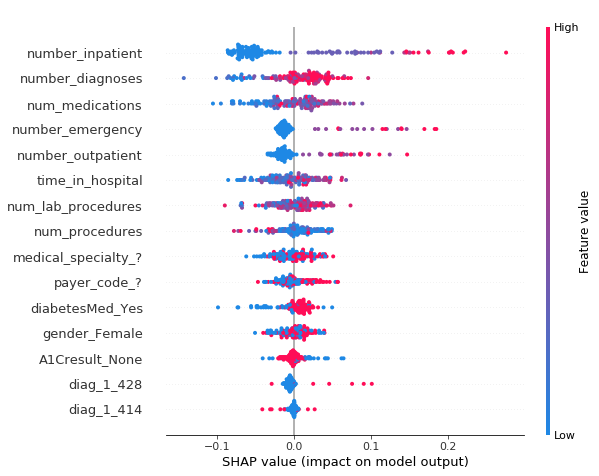

In [60]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(small_val_X)

shap.summary_plot(shap_values[1], small_val_X)

## Question 1

Which of the following features has a bigger range of effects on predictions (i.e. larger difference between most positive and most negative effect)
- `diag_1_428` or
- `payer_code_?`

In [ ]:
# set following variable to 'diag_1_428' or 'payer_code_?'
feature_with_bigger_range_of_effects = _
q_1.check()

Uncomment the line below to see the solution and explanation

In [ ]:
# q_1.solution()

## Question 2

Do you believe the range of effects sizes (distance between smallest effect and largest effect) is a good indication of which feature will have a higher permutation importance? Why or why not?  

If the **range of effect sizes** measures something different from **permutation importance**: which is a better answer for the question "Which of these two features does the model say is more important for us to understand when discussing readmission risks in the population?"

Uncomment the following line after you've decided your answer.

In [ ]:
# q_2.solution()

## Question 3

Both `diag_1_428` and `payer_code_?` are binary variables, taking values of 0 or 1.

From the graph, which do you think would typically have a bigger impact on predicted readmission risk:
- Changing `diag_1_428` from 0 to 1
- Changing `payer_code_?` from 0 to 1

To save you scrolling, we have included a cell below to plot the graph again (this one runs quickly).

In [ ]:
shap.summary_plot(shap_values[1], small_val_X)

In [ ]:
# Set following var to "diag_1_428" if changing it to 1 has bigger effect.  Else set it to 'payer_code_?'
bigger_effect_when_changed = _
q_3.check()

For a solution and explanation, uncomment the line below

In [ ]:
# q_3.solution()

## Question 4

Some features (like `number_inpatient`) have reasonably clear separation between the blue and pink dots. Other variables like `num_lab_procedures` have blue and pink dots jumbled together, even though the SHAP values (or impacts on prediction) aren't all 0.

What do you think you learn from the fact that `num_lab_procedures` has blue and pink dots jumbled together? Once you have your answer, uncomment the line below to verify your solution.

In [ ]:
# q_4.solution()

## Question 5

Consider the following SHAP contribution dependence plot. 

The x-axis shows `feature_of_interest` and the points are colored based on `other_feature`.

![Imgur](https://i.imgur.com/zFdHneM.png)

Is there an interaction between `feature_of_interest` and `other_feature`?  
If so, does `feature_of_interest` have a more positive impact on predictions when `other_feature` is high or when `other_feature` is low?

Uncomment the following code when you are ready for the answer.


In [ ]:
# q_5.solution()

## Question 6

Review the summary plot for the readmission data by running the following cell:

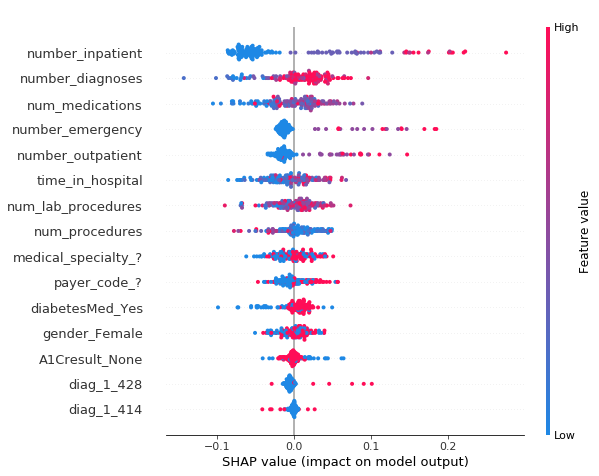

In [70]:
shap.summary_plot(shap_values[1], small_val_X)

Both **num_medications** and **num_lab_procedures** share that jumbling of pink and blue dots.

Aside from `num_medications` having effects of greater magnitude (both more positive and more negative), it's hard to see a meaningful difference between how these two features affect readmission risk.  Create the SHAP dependence contribution plots for each variable, and describe what you think is different between how these two variables affect predictions.

As a reminder, here is the code you previously saw to create this type of plot.

    shap.dependence_plot(feature_of_interest, shap_values[1], val_X)
    
And recall that your validation data is called `small_val_X`.

In [71]:
# Your code here


Then uncomment the following line to compare your observations from this graph to the solution.

In [72]:
# q_6.solution()

## Congrats

That's it!  Machine Learning models should not feel like black boxes any more, because you have the tools to inspect them and understand what they learn about the world. 

This is an excellent skill for debugging models, building trust, and learning insights to make better decisions. These techniques have revolutionized how I do data science, and I hope they do the same for you.

Real data science involves an element of exploration. I hope you find an interesting dataset to try these techniques on (Kaggle has a lot of [free datasets](https://www.kaggle.com/datasets) to try out). If you learn something interesting about the world, share your work [in this forum](https://www.kaggle.com/learn-forum/66354). I'm excited to see what you do with your new skills.

---

**[Course Home Page](https://www.kaggle.com/learn/machine-learning-for-insights)**
